In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
data = pd.read_csv('WineQT.csv')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
print(data.info())  # Check columns, data types, missing values
print(data.describe())  # Statistical summary
print(data['quality'].value_counts())  # Class distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

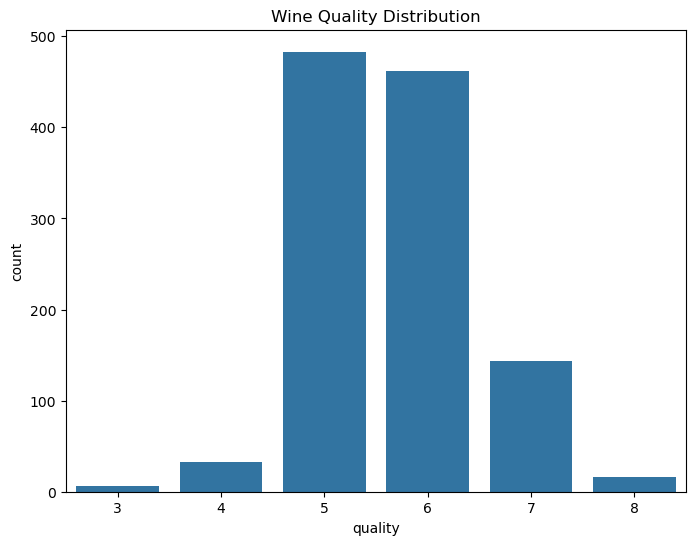

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Wine Quality Distribution')
plt.show()

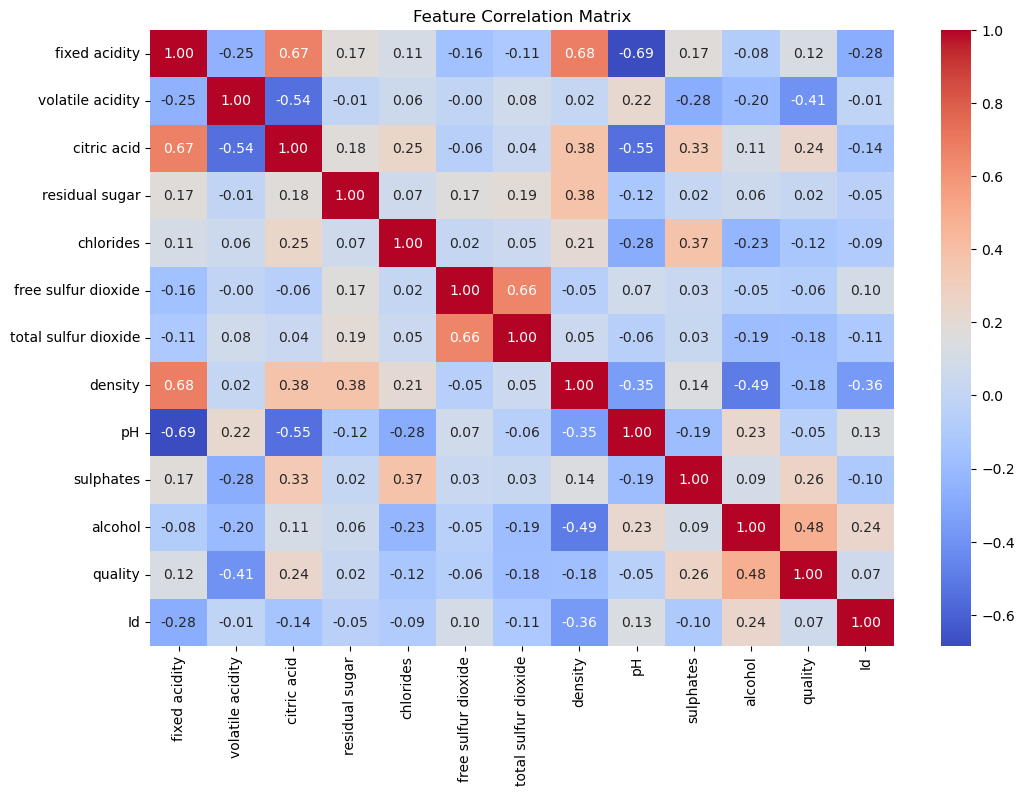

In [5]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

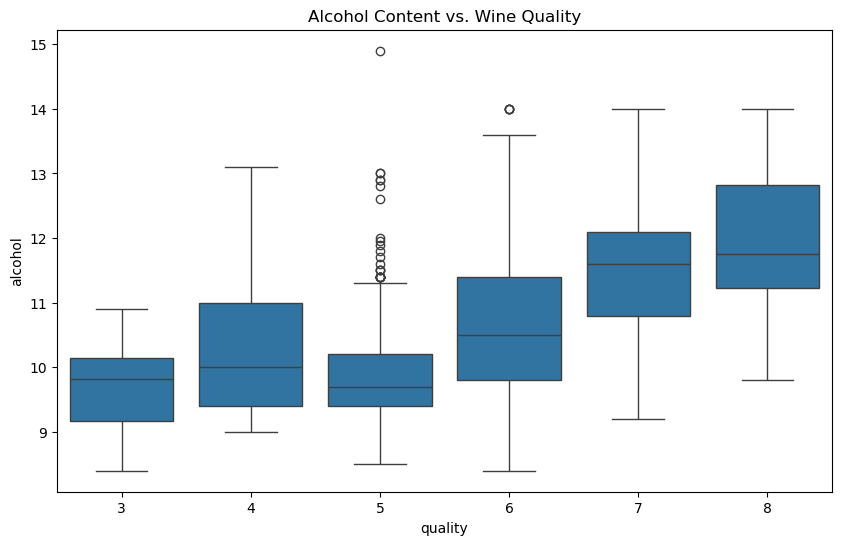

In [6]:
# Example: Alcohol vs. Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Alcohol Content vs. Wine Quality')
plt.show()

In [7]:
#data processing
data['quality_binary'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)
print(data['quality_binary'].value_counts())  # Check new distribution

quality_binary
0    984
1    159
Name: count, dtype: int64


In [8]:
#train,test, split
from sklearn.model_selection import train_test_split

X = data.drop(['quality', 'quality_binary'], axis=1)  # Features
y = data['quality_binary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#Model Training
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       197
           1       0.77      0.62      0.69        32

    accuracy                           0.92       229
   macro avg       0.86      0.80      0.82       229
weighted avg       0.92      0.92      0.92       229

Accuracy: 0.9213973799126638


In [12]:
#Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=1000, random_state=42)
sgd.fit(X_train_scaled, y_train)

y_pred_sgd = sgd.predict(X_test_scaled)

print("\nSGD Classifier Results:")
print(classification_report(y_test, y_pred_sgd))
print("Accuracy:", accuracy_score(y_test, y_pred_sgd))


SGD Classifier Results:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       197
           1       0.62      0.50      0.55        32

    accuracy                           0.89       229
   macro avg       0.77      0.72      0.74       229
weighted avg       0.88      0.89      0.88       229

Accuracy: 0.8864628820960698


In [13]:
#Support Vector Classifier (SVC)
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

print("\nSVC Results:")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))


SVC Results:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       197
           1       0.76      0.41      0.53        32

    accuracy                           0.90       229
   macro avg       0.84      0.69      0.74       229
weighted avg       0.89      0.90      0.89       229

Accuracy: 0.8995633187772926


In [14]:
#Model Comparison
models = {
    'Random Forest': y_pred_rf,
    'SGD': y_pred_sgd,
    'SVC': y_pred_svc
}

for name, pred in models.items():
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(classification_report(y_test, pred))


Random Forest Performance:
Accuracy: 0.9214
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       197
           1       0.77      0.62      0.69        32

    accuracy                           0.92       229
   macro avg       0.86      0.80      0.82       229
weighted avg       0.92      0.92      0.92       229


SGD Performance:
Accuracy: 0.8865
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       197
           1       0.62      0.50      0.55        32

    accuracy                           0.89       229
   macro avg       0.77      0.72      0.74       229
weighted avg       0.88      0.89      0.88       229


SVC Performance:
Accuracy: 0.8996
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       197
           1       0.76      0.41      0.53        32

    accuracy                           0.90       229
   macro avg 

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

print("\nOptimized Random Forest Results:")
print(classification_report(y_test, y_pred_best))